In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import HTC

In [2]:
# Load the serialized output from the simulation
output=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-15-20-25-30-35.bin','rb'))
attempts=pickle.load(open('weight_100run_6000time_0-0to0-3tc_0-10-15-20-25-30-35_attempts.bin', 'rb'))

In [3]:
len(output[0])

1

In [4]:
n_attempts=len(attempts)
attempts

{0: 1, 10: 10, 15: 5, 20: 10, 25: 5, 30: 10, 35: 5}

In [5]:
# Take the mean of the different attempts with the same connectome (as suggested by Giacomo)
a_f=np.zeros((n_attempts,len(output[0][0]['activity']) ))
sigma_a_f=np.zeros((n_attempts,len(output[0][0]['sigma_activity']) ))
s1_f=np.zeros((n_attempts,len(output[0][0]['s1']) ))
s2_f=np.zeros((n_attempts,len(output[0][0]['s2']) ))





for j in range(len(output)):
    # The temporary containers for the simulated data
    a=np.zeros(((len(output[j])),len(output[j][0]['activity'])))
    sigma_a=np.zeros(((len(output[j])),len(output[j][0]['sigma_activity'])))
    s1=np.zeros((len(output[j]),len(output[j][0]['s1'])))
    s2=np.zeros((len(output[j]),len(output[j][0]['s2'])))
    for i in range(len(output[j])):
        a[i]=output[j][i]['activity']
        sigma_a[i]=output[j][i]['sigma_activity']
        s1[i]=output[j][i]['s1']
        s2[i]=output[j][i]['s2']
        
    a_f[j]=np.mean(a, axis=0)
    sigma_a_f[j]=np.mean(sigma_a, axis=0)
    s1_f[j]=np.mean(s1, axis=0)
    s2_f[j]=np.mean(s2, axis=0)


In [6]:
# Plot all the interesting observables
#fig,ax=plt.subplots(2,2, figsize=(15,15))

#colormap = plt.cm.jet #nipy_spectral, Set1,Paired   
#colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax1.lines))]

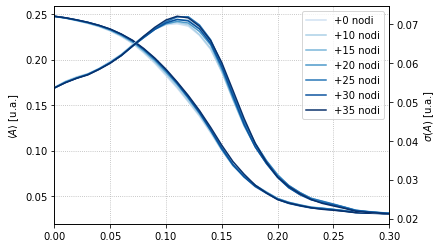

In [32]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    ax1.plot(output[0][0]['tc'],a_f[i], label='+'+str(j)+' nodi')#, lw=0.5)
    #ax1.scatter(output[0][0]['tc'],a_f[i])#, label='+'+str(j)+' nodi')


colormap = plt.cm.Blues #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.2, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])

ax2 = ax1.twinx()
    
for i,j in enumerate(attempts):
    ax2.plot(output[0][0]['tc'],sigma_a_f[i], label='+'+str(j)+' nodi')
    
    
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])


ax1.legend()
plt.xlim(0,0.3)
ax1.grid(linestyle='dotted')
plt.xlabel('Parametro T')
ax1.set_ylabel(r'$\langle A\rangle$ [u.a.]')
ax2.set_ylabel(r'$\sigma (A)$ [u.a.]')


plt.savefig('../Figure/Simulazione/Addw/a_sa.pdf', bbox_inches='tight')
plt.show()

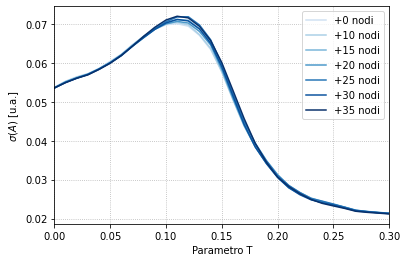

In [8]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],sigma_a_f[i], label='+'+str(j)+' nodi')
    
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T')
plt.xlim(0,0.3)
plt.ylabel(r'$\sigma (A)$ [u.a.]')
plt.savefig('../Figure/Simulazione/Addw/sa.pdf', bbox_inches='tight')

plt.show()

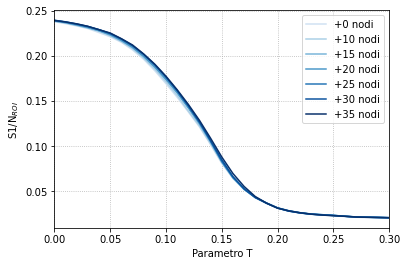

In [9]:

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],s1_f[i]/66, label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T')
plt.ylabel(r'S1/N$_{ROI}$')
plt.xlim(0,0.3)
plt.savefig('../Figure/Simulazione/Addw/s1.pdf', bbox_inches='tight')

plt.show()

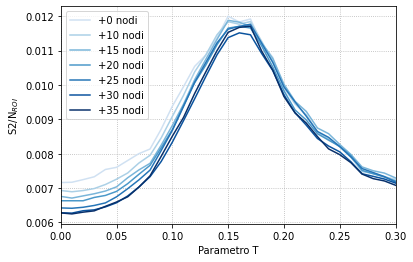

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)


for i,j in enumerate(attempts):
    plt.plot(output[0][0]['tc'],s2_f[i]/66, label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
plt.grid(linestyle='dotted')
plt.xlabel('Parametro T')
plt.ylabel(r'S2/N$_{ROI}$')
plt.xlim(0,0.3)
plt.savefig('../Figure/Simulazione/Addw/s2.pdf', bbox_inches='tight')

plt.show()

In [11]:
rho_f=np.zeros((len(output),len(output[0][0]['tc'])))
chi_f=np.zeros((len(output),len(output[0][0]['tc'])))
rho=np.zeros((len(output[0]),len(output[0][0]['tc'])))
chi=np.zeros((len(output[0]),len(output[0][0]['tc'])))
for i in range(len(output)):
    rho,chi = HTC.rho_chi_added_weights( output[i], 'set')
    rho_f[i]=np.mean(rho,axis=0)
    chi_f[i]=np.mean(chi,axis=0)

/mnt/c/Users/berto/NotSync/GitHub/TesiTriennale/Code/Utilities.py:211: RuntimeWarning: invalid value encountered in true_divide
  chi[w, i] = np.sqrt(np.nansum((h_fmri-h_norm)**2/(h_fmri+h_norm)))


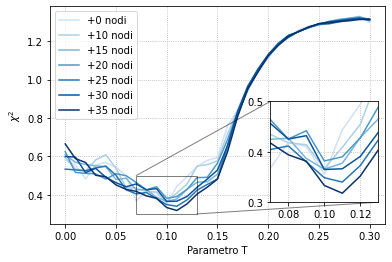

In [12]:
#fig,ax=plt.subplots(1,2, figsize=(15,5))
#fig.suptitle('Elemets set to zero')

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i,j in enumerate(attempts):
    ax1.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
    
plt.legend()
#plt.title('Chi')
plt.ylabel(r'$\chi^2$')
plt.xlabel('Parametro T')
plt.grid(linestyle='dotted')


left, bottom, width, height = [0.635, 0.2, 0.25, 0.35]
ax4 = fig1.add_axes([left, bottom, width, height])

for i,j in enumerate(attempts):
    ax4.plot(output[0][0]['tc'], chi_f[i], label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax4.lines):
    j.set_color(colors[i])

ax4.set_xlim(0.07, 0.13)
ax4.set_ylim(0.3,0.50)
ax4.grid(True, linestyle='dotted')
#ax4.set_xticks([0.0,0.12])
ax4.set_yticks([0.30,0.40, 0.50])
ax4.grid(True, linestyle='dotted')
ax1.indicate_inset_zoom(ax4, edgecolor="black")


plt.savefig('../Figure/Simulazione/Addw/chi.pdf', bbox_inches='tight')

plt.show()

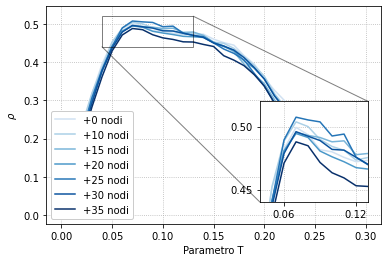

In [13]:
    
fig2 = plt.figure()
ax2 = fig2.add_subplot(111) 
    
for i,j in enumerate(attempts):
    ax2.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax2.lines):
    j.set_color(colors[i])



#plt.title('Rho')
plt.ylabel(r'$\rho$')
plt.xlabel('Parametro T')
plt.grid(linestyle='dotted')
plt.legend(loc=3, framealpha=1)


left, bottom, width, height = [0.62, 0.2, 0.25, 0.35]
ax3 = fig2.add_axes([left, bottom, width, height])

for i,j in enumerate(attempts):
    ax3.plot(output[0][0]['tc'], rho_f[i], label='+'+str(j)+' nodi')
    
for i,j in enumerate(ax3.lines):
    j.set_color(colors[i])
    
ax3.set_xlim(0.04,0.13)
ax3.set_ylim(0.44,0.52)
ax3.grid(True, linestyle='dotted')
ax3.set_xticks([0.06,0.12])
ax3.set_yticks([0.45, 0.50])
ax3.grid(True, linestyle='dotted')
ax2.indicate_inset_zoom(ax3, edgecolor="black")



plt.savefig('../Figure/Simulazione/Addw/rho.pdf', bbox_inches='tight')

plt.show()

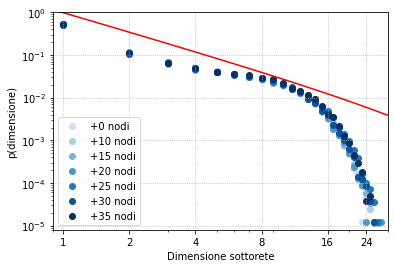

In [14]:
s_distributions=[HTC.get_sizes_distribution(output[i][0]['s_distrib']) for i in range(n_attempts)]

def fitter(x,alpha, gamma):
    return x**(-alpha)*np.exp(-x*gamma)

alpha,gamma=3/2,1/66
x_model=np.linspace(0.1,30, 100)
y_model=fitter(x_model, alpha, gamma)


fig, ax=plt.subplots()
for i,j in enumerate(attempts):
    ax.scatter(s_distributions[i][0],s_distributions[i][1] , color=colors[i], label='+'+str(j)+' nodi')

ax.plot(x_model, y_model, color='r')
    
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlabel("Dimensione sottorete")
ax.set_ylabel("p(dimensione)")
ax.set_xticks([1,2,4,8,16,24])
ax.set_xlim(0.9,30)
ax.set_ylim(0.8e-5,1)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.legend()
plt.grid(linestyle='dotted')
plt.savefig('../Figure/Simulazione/Addw/add_w_s_distrib.pdf', bbox_inches='tight')
plt.show()